Acessando o Drive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Imports

In [2]:
import os
import numpy as np 
import pandas as pd

import torch
import torchvision
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image, ImageDraw
import xml.etree.ElementTree as ET

root_path = 'gdrive/MyDrive/UFRN-ECT/Deep Learning/Projeto Detecção Barcos/dataset' 
images_dir = root_path+'/images/'
annotations_dir = root_path+'/annotations/'

/content/gdrive/MyDrive/Boat detection/darknet/data/obj


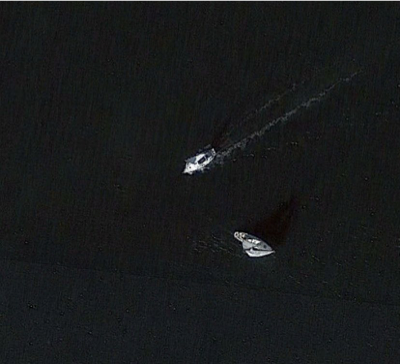

In [13]:
%cd /content/gdrive/MyDrive/Boat\ detection/darknet/data/obj/
sample_image = Image.open('boat4.png')
sample_image

In [ ]:
tree = ET.parse(annotations_dir+'boat4.xml')
root = tree.getroot()

sample_annotations = []

for neighbor in root.iter('bndbox'):
    xmin = int(neighbor.find('xmin').text)
    ymin = int(neighbor.find('ymin').text)
    xmax = int(neighbor.find('xmax').text)
    ymax = int(neighbor.find('ymax').text)

    sample_annotations.append([xmin, ymin, xmax, ymax])

print('')
print(sample_annotations)

[[232, 229, 275, 257], [183, 146, 221, 174]]


**Plot anotação**

[232, 229, 275, 257]
[183, 146, 221, 174]


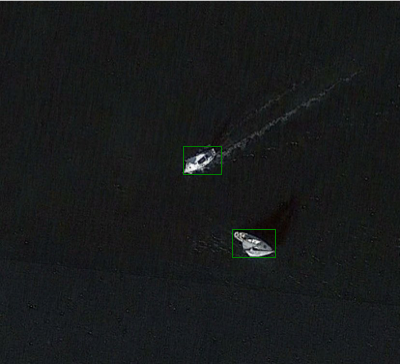

In [ ]:
sample_image_annotated = sample_image.copy()

img_bbox = ImageDraw.Draw(sample_image_annotated)

for bbox in sample_annotations:
    print(bbox)
    img_bbox.rectangle(bbox, outline="green") 
    
sample_image_annotated

Convertendo labels para o formato txt

Ref: https://www.kaggle.com/suneetsaini/yolo-annotation-xml-to-text-format-conversion

In [ ]:
#!git clone https://github.com/Isabek/XmlToTxt.git

Cloning into 'XmlToTxt'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 99 (delta 22), reused 19 (delta 19), pack-reused 73
Unpacking objects: 100% (99/99), done.


**Iniciando com YOLO**

In [ ]:
%cd /content/gdrive/MyDrive/Boat\ detection/darknet

#%cd images
!ls

In [ ]:
!pip install -r requirements.txt

In [ ]:
!rm -rf xml/*.*
!rm -rf out/*.*

In [ ]:
!cp /content/gdrive/MyDrive/UFRN-ECT/Deep\ Learning/Projeto\ Detecção\ Barcos/dataset/annotations/*.xml xml/

In [ ]:
#MyDrive/UFRN-ECT/Deep Learning/Projeto Detecção Barcos/dataset 
!sed -i 's/bus/boat/' classes.txt
!cat classes.txt

boat


In [ ]:
!ls -l | grep -v ^l | wc -l

622


622 no Total
497 - treino
125 - teste

In [ ]:
for i in range(640, 694):
  #%cp images/'boat{i}'.png train/
  #%cp images/'boat{i}'.txt train/


cp: cannot stat 'images/boat640.png': No such file or directory
cp: cannot stat 'images/boat640.txt': No such file or directory
cp: cannot stat 'images/boat650.png': No such file or directory
cp: cannot stat 'images/boat650.txt': No such file or directory
cp: cannot stat 'images/boat667.png': No such file or directory
cp: cannot stat 'images/boat667.txt': No such file or directory
cp: cannot stat 'images/boat668.png': No such file or directory
cp: cannot stat 'images/boat668.txt': No such file or directory
cp: cannot stat 'images/boat674.png': No such file or directory
cp: cannot stat 'images/boat674.txt': No such file or directory
cp: cannot stat 'images/boat684.png': No such file or directory
cp: cannot stat 'images/boat684.txt': No such file or directory
cp: cannot stat 'images/boat686.png': No such file or directory
cp: cannot stat 'images/boat686.txt': No such file or directory


In [ ]:
!ls test/ -l | grep -v ^l | wc -l 

251


In [ ]:
!cp cfg/yolov4-custom.cfg /content/gdrive/MyDrive/UFRN-ECT/Deep\ Learning/Projeto\ Detecção\ Barcos/dataset/yolov4-obj.cfg

cp: cannot stat 'cfg/yolov4-custom.cfg': No such file or directory


Running YOLO

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15308, done.
remote: Total 15308 (delta 0), reused 0 (delta 0), pack-reused 15308
Receiving objects: 100% (15308/15308), 13.69 MiB | 4.36 MiB/s, done.
Resolving deltas: 100% (10404/10404), done.
Checking out files: 100% (2044/2044), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/gdrive/My Drive/UFRN-ECT/Deep Learning/Projeto Detecção Barcos/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [ ]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

In [16]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
# pesos pré-treinados
#!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights
%ls ../

'Boat detection project - UFRN.ipynb'   darknet/   dataset/   dataset.zip


In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp .././dataset/yolov4-obj.cfg ./cfg

In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
#!cp .././dataset/obj.names ./data
#!cp .././dataset/obj.data  ./data

#!cp ./data/obj.data ./

In [ ]:
!python generate_train.py
!python generate_test.py

In [ ]:
!ls

3rdparty		darknet.py	       net_cam_v4.sh
backup			darknet_video.py       obj
build			data		       obj.data
build.ps1		generate_test.py       obj.names
cfg			generate_train.py      README.md
chart.png		image_yolov3.sh        results
chart_yolov4-obj.png	image_yolov4.sh        scripts
cmake			include		       src
CMakeLists.txt		json_mjpeg_streams.sh  vcpkg.json
darknet			LICENSE		       video_yolov3.sh
DarknetConfig.cmake.in	Makefile	       video_yolov4.sh
darknet_images.py	net_cam_v3.sh	       yolov4.conv.137


In [ ]:
%cd cfg
!sed -i 's/batch=1/batch=64/' yolov4-obj.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' yolov4-obj.cfg
%cd ..

/content/gdrive/My Drive/Boat detection/darknet/cfg
/content/gdrive/My Drive/Boat detection/darknet


In [15]:
!chmod +x ./darknet

In [ ]:
# train your custom detector! (uncomment %%capture below if you run into memory issues or your Colab is crashing)
# %%capture
!./darknet detector train data/obj.data cfg/yolov4-obj.cfg yolov4.conv.137 -dont_show -map

A saída de streaming foi truncada nas últimas 5000 linhas.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.721824), count: 5, class_loss = 0.243235, iou_loss = 0.270757, total_loss = 0.513992 
 total_bbox = 833215, rewritten_bbox = 0.870004 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.799400), count: 10, class_loss = 0.361329, iou_loss = 12.513478, total_loss = 12.874807 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.833232), count: 19, class_loss = 0.286480, iou_loss = 7.183208, total_loss = 7.469688 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.752314), count: 4, class_loss = 0.034754, iou_loss = 0.175433, total_loss = 0.210188 
 total_bbox = 833248, rewritten_bbox = 0.869969 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.814165), count: 8, class_loss = 0.682291, iou_loss = 11.182144, total_loss =

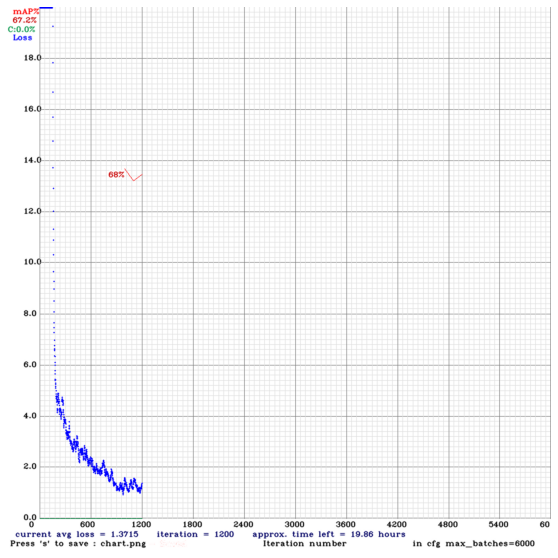

In [ ]:
# show chart.png of how custom object detector did with training
imShow('chart.png')

In [ ]:
!./darknet detector map data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/backup/yolov4-obj_1000.weights

In [ ]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-obj.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-obj.cfg
%cd ..

/content/gdrive/My Drive/Boat detection/darknet/cfg
/content/gdrive/My Drive/Boat detection/darknet


/content/gdrive/MyDrive/Boat detection/darknet
 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Cannot load image data/labels/82_0.png
Cannot load image data/labels/85_0.png
Cannot load image data/labels/86_0.png
Cannot load image data/labels/90_0.png
Cannot load image data/labels/98_0.png
Cannot load image data/labels/81_1.png
Cannot load image data/labels/88_1.png
Cannot load image data/labels/90_1.png
Cannot load image data/labels/93_1.png
Cannot load image data/labels/96_1.png
Cannot load image data/labels/79_2.png
Cannot load image data/labels/82_2.png
Cannot load image data/labels/83_2.png
Cannot load image data/labels/98_2.png
Cannot load image data/labels/99_2.png
Cannot load image data/labels/80_3.png
Cannot load image data/labels/83_3.png
Cannot load image data/labels/86_3.png
Cannot load image data/labels/90_3.png
Cannot load image data/labels/91_3.png
Cannot load image data/labels/92_3.png
Cannot load image data/

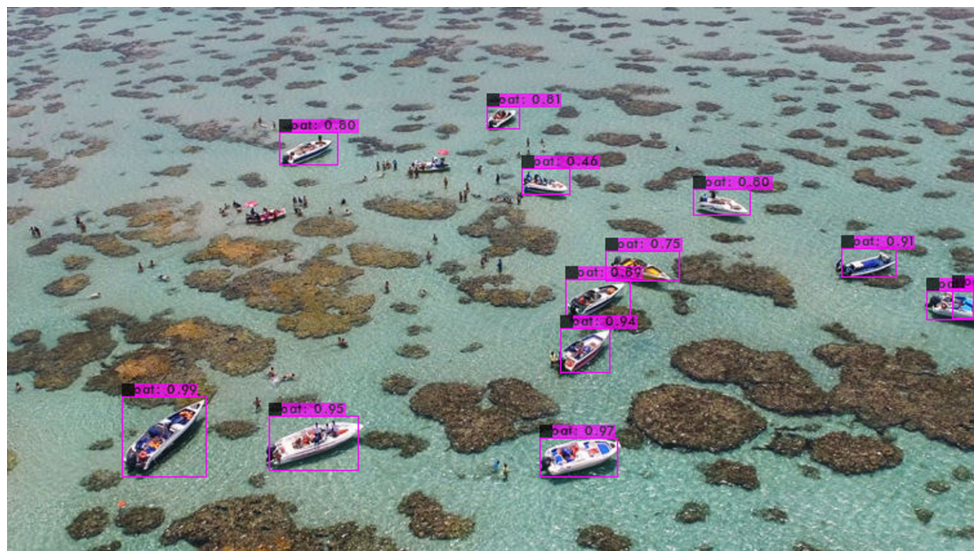

In [17]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
%cd /content/gdrive/MyDrive/Boat\ detection/darknet
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg /content/gdrive/MyDrive/Boat\ detection/darknet/backup/yolov4-obj_last.weights /content/barcos_rn.png -thresh 0.3
imShow('predictions.jpg')

/content/gdrive/MyDrive/Boat detection/darknet
 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Cannot load image data/labels/82_0.png
Cannot load image data/labels/85_0.png
Cannot load image data/labels/86_0.png
Cannot load image data/labels/90_0.png
Cannot load image data/labels/98_0.png
Cannot load image data/labels/81_1.png
Cannot load image data/labels/88_1.png
Cannot load image data/labels/90_1.png
Cannot load image data/labels/93_1.png
Cannot load image data/labels/96_1.png
Cannot load image data/labels/79_2.png
Cannot load image data/labels/82_2.png
Cannot load image data/labels/83_2.png
Cannot load image data/labels/98_2.png
Cannot load image data/labels/99_2.png
Cannot load image data/labels/80_3.png
Cannot load image data/labels/83_3.png
Cannot load image data/labels/86_3.png
Cannot load image data/labels/90_3.png
Cannot load image data/labels/91_3.png
Cannot load image data/labels/92_3.png
Cannot load image data/

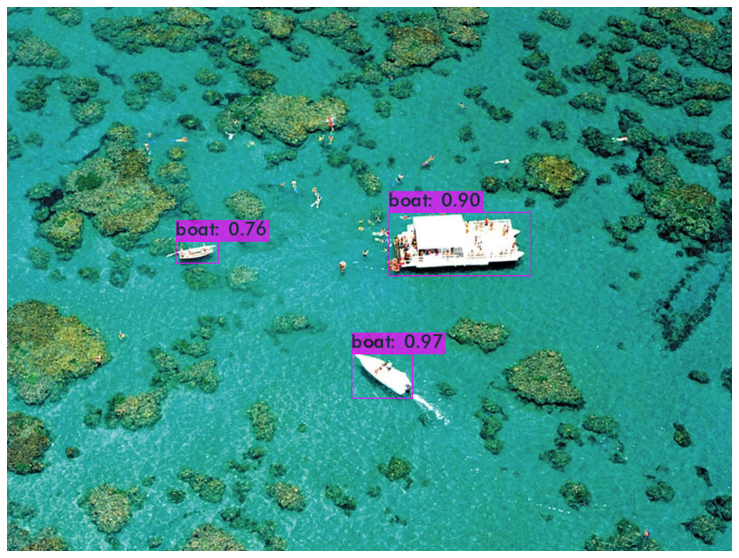

In [18]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
%cd /content/gdrive/MyDrive/Boat\ detection/darknet
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg /content/gdrive/MyDrive/Boat\ detection/darknet/backup/yolov4-obj_last.weights /content/maracajau.jpeg -thresh 0.3
imShow('predictions.jpg')

/content/gdrive/MyDrive/Boat detection/darknet
 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Cannot load image data/labels/82_0.png
Cannot load image data/labels/85_0.png
Cannot load image data/labels/86_0.png
Cannot load image data/labels/90_0.png
Cannot load image data/labels/98_0.png
Cannot load image data/labels/81_1.png
Cannot load image data/labels/88_1.png
Cannot load image data/labels/90_1.png
Cannot load image data/labels/93_1.png
Cannot load image data/labels/96_1.png
Cannot load image data/labels/79_2.png
Cannot load image data/labels/82_2.png
Cannot load image data/labels/83_2.png
Cannot load image data/labels/98_2.png
Cannot load image data/labels/99_2.png
Cannot load image data/labels/80_3.png
Cannot load image data/labels/83_3.png
Cannot load image data/labels/86_3.png
Cannot load image data/labels/90_3.png
Cannot load image data/labels/91_3.png
Cannot load image data/labels/92_3.png
Cannot load image data/

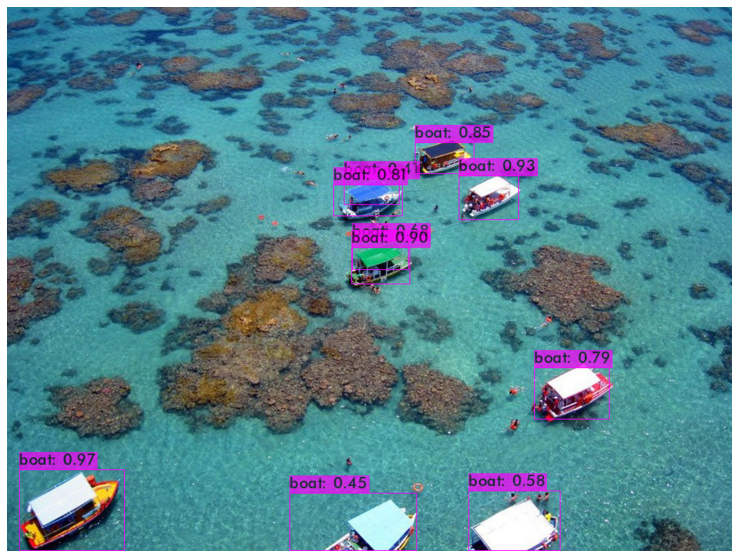

In [23]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
%cd /content/gdrive/MyDrive/Boat\ detection/darknet
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg /content/gdrive/MyDrive/Boat\ detection/darknet/backup/yolov4-obj_last.weights /content/maracajau_2.jpg #-thresh 0.3
imShow('predictions.jpg')

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
%cd /content/gdrive/MyDrive/Boat\ detection/darknet
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg /content/gdrive/MyDrive/Boat\ detection/darknet/backup/yolov4-obj_last.weights /content/barcos2.jpeg -thresh 0.3
imShow('predictions.jpg')